## Machine Learning Studies

#### downloading the database

In [14]:
import numpy as np

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

#### visualizing the database

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
some_digt = X[0]
some_digt_image = some_digt.reshape(28,28)

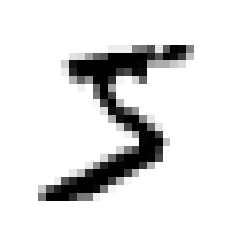

In [12]:
plt.imshow(some_digt_image,cmap='binary')
plt.axis('off')
plt.show()

In [16]:
y[0]

'5'

transform the data into integer

In [18]:
y = y.astype(np.uint8)
y[0]

5

dividing the database into test and train set

In [19]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

#### Training a Binary Classifier

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.predict([some_digt])

array([ True])

the model predict that the number in some_digt is the number five, because the model has been trained to only recognize 5 so it will return true if its a five and false otherwise

#### Performance Measures

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3 , scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

the cross validation method is going to random split the training set in 3 folds (subsets), then it will pick a fold for evaluation and training the model with the others folds.

this seems to be a good model, however we are talking about a model that only predicts if the number is 5 or not. Now, lets creat a dumb model that is going to always return false for all numbers and lets evaluate this model to compare with our previous model

In [25]:
from sklearn.base import BaseEstimator

In [27]:
class Never5Classifier(BaseEstimator):
    def fit(self,X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [29]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

we can see that even a dumb classifier as a good accurancy, because this data base has around 10% of the number 5